imported
loaded


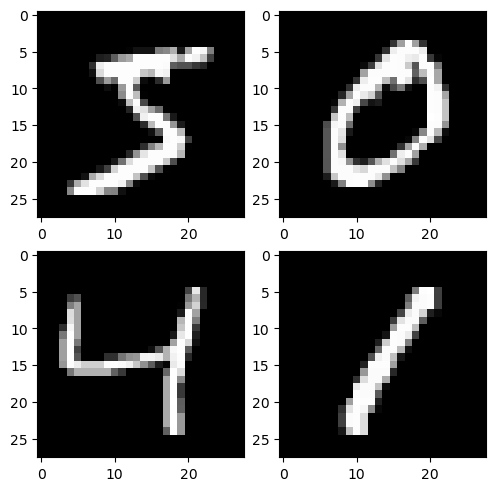

In [1]:
from glio.importsall import *
from glio.datasets import MNIST
print('imported')
dstrain, dstest = MNIST.get_mnist_classification()
print('loaded')
dstrain.preview()

In [2]:
class SLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = LinearBlock(28*28, 10, act=nn.Softmax(dim=1), flatten=True)
    
    def forward(self,x):
        return self.linear(x)

def get_model(): return SLP()
print(f'{count_parameters(get_model()) = }')
gsummary(get_model(), (1, 1, 28,28))

count_parameters(get_model()) = 7850
path                                         module                                       input size               output size              params    buffers   
__main__.SLP/linear/0                        torch.nn.modules.flatten.Flatten             (1, 1, 28, 28)           (1, 784)                 0         0         
__main__.SLP/linear/1                        torch.nn.modules.linear.Linear               (1, 784)                 (1, 10)                  7850      0         
__main__.SLP/linear/2                        torch.nn.modules.activation.Softmax          (1, 10)                  (1, 10)                  0         0         


# 1e-1
unstable

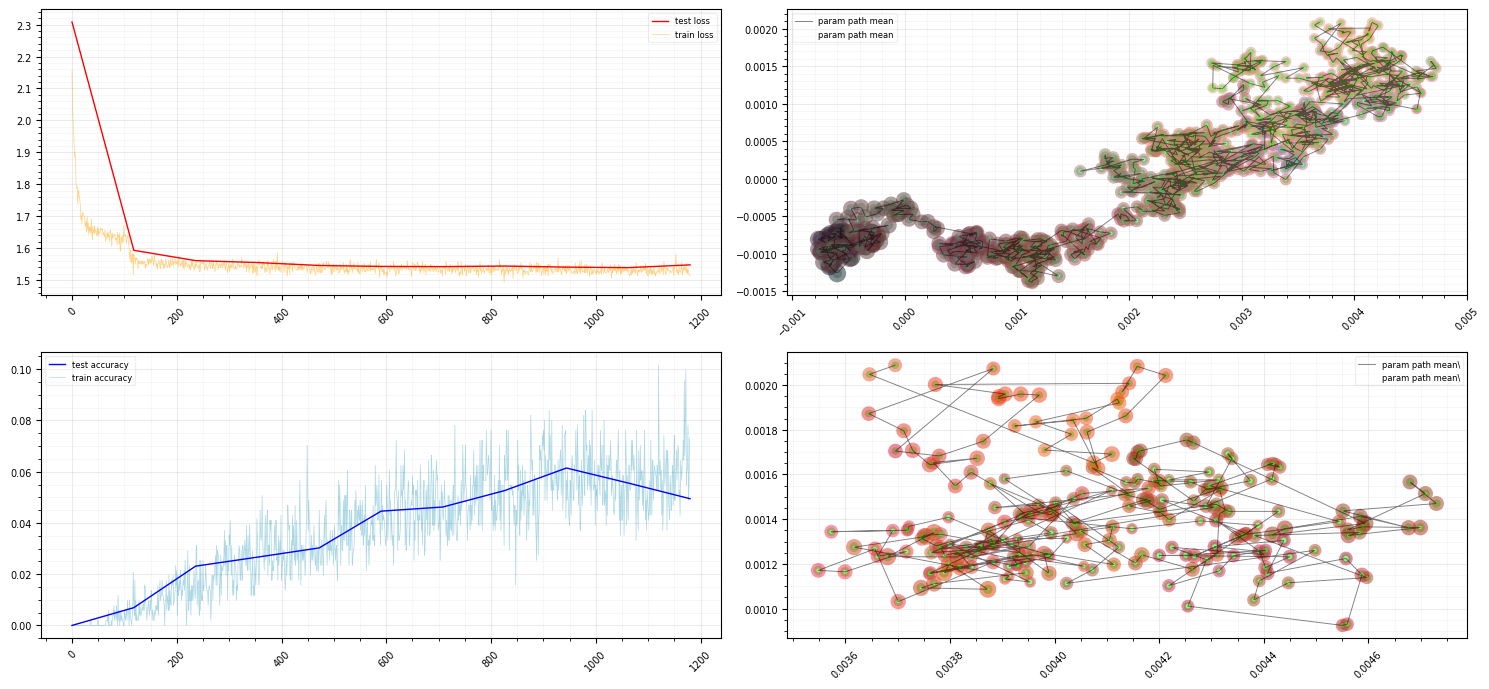

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉     | 10/10 | 5.95s/ops, elapsed: 53.59s, rem: 5.95s | 

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉  | 20/20 | 65.07ops/s, elapsed: 292ms, rem: 15ms | 
train loss:                              last = 1.514, min = 1.494, max = 2.154
test loss:                               last = 1.539, min = 1.539, max = 2.308
train accuracy:                          last = 0.073, min = 0.000, max = 0.102
test accuracy:                           last = 0.056, min = 0.000, max = 0.061

| metric | n | min | max | first | last |
| :- | :- | :- | :- | :- | :- |
| grad std | 1180 | 0.0005 | 0.0082 | 0.0042 | 0.0019 |
| grad-update angle | 1180 | 1.3242 | 1.8185 | 1.6791 | 1.5909 |
| grad-update mean | 1180 | 0.0003 | 0.0082 | 0.0025 | 0.0011 |
| last grads mean | 1179 | 0.0005 | 0.0070 | 0.0045 | 0.0013 |
| last updates std | 1179 | 0.0004 | 0.0072 | 0.0047 | 0.0039 |
| param max | 1180 | 0.0565 | 1.1083 | 0.0565 | 1.0977 |
| param mean | 1180 | -0.0001 | -0.0001 | -0.0001 | -0.0001 |
| param min | 1180 | -0.9858 | -0.0523 | -0.0523 | -0.9789 |
| param var | 1180 | 0.0004 | 0.0250 | 0.0004 | 0.0250 |
| train accuracy | 1180 | 0.0000 | 0.1016 | 0.0000 | 0.0729 |
| test accuracy | 11 | 0.0000 | 0.0614 | 0.0000 | 0.0495 |
| test accuracy max | 11 | 0.0000 | 0.1074 | 0.0000 | 0.1035 |
| test accuracy median | 11 | 0.0000 | 0.0597 | 0.0000 | 0.0479 |
| test accuracy min | 11 | 0.0000 | 0.0215 | 0.0000 | 0.0156 |
| train loss | 1180 | 1.4938 | 2.1541 | 2.1541 | 1.5141 |
| test loss | 11 | 1.5394 | 2.3080 | 2.3080 | 1.5481 |
| test loss max | 11 | 1.5914 | 2.3129 | 2.3129 | 1.6073 |
| test loss median | 11 | 1.5438 | 2.3085 | 2.3085 | 1.5520 |
| test loss min | 11 | 1.4902 | 2.3020 | 2.3020 | 1.4991 |
| time | 1180 | 0.7269 | 58.7748 | 0.7269 | 58.7748 |
| update angle | 1180 | 0.0029 | 0.3471 | 0.2030 | 0.0123 |
| update var | 1180 | 0.0000 | 0.0001 | 0.0000 | 0.0000 |


In [3]:
from torchzero.optim.first_order.gradient_direction_curvature import QuadraticGDC
with seeded_rng(): MODEL = get_model()
LR = 1
MAGN = None
BATCH_SIZE = 512
N_EPOCHS = 10
LOSS_FN = nn.CrossEntropyLoss()
METRIC_STEP = 1

with seeded_rng():
    DLTRAIN = DataLoader(dstrain, BATCH_SIZE, shuffle=True, **seed0_kwargs)
    DLTEST = DataLoader(dstest, BATCH_SIZE, shuffle=False, **seed0_kwargs)

OPT = QuadraticGDC(MODEL.parameters(), lr = LR, debug=True)
#SCHED = lr_scheduler.CosineAnnealingLR(OPT, N_EPOCHS)
SCHED = None

CALLBACKS = (LogLossCB(),

            SaveForwardChannelImagesCB(dstest[0][0].unsqueeze(0)),
            MetricAccuracyCB(),
            LogParamDistCB(METRIC_STEP),
            LogParamPathCB(METRIC_STEP),
            LogUpdateDistCB(METRIC_STEP),
            LogUpdatePathCB(METRIC_STEP),
            LogLastUpdatesAngleCB(METRIC_STEP),
            LogGradDistCB(METRIC_STEP),
            LogGradUpdateAngleCB(METRIC_STEP),
            LogGradPathCB(METRIC_STEP),
            LogLastGradsAngleCB(METRIC_STEP),
            LogTimeCB(),
            #LogLRCB(),
            #LogOptimizerParamCB('magn'),
            DisplayLoggerTableCB(),
            AccelerateCB("no"),
            PerformanceTweaksCB(True),
            SaveLastCB(),
            LivePlotCB(1000, plot_keys = ("4plotsplot","10metrics01"),path_keys=("4plotspath250",)),
            SimpleProgressBarCB(),
            OneBatchClosureCB(),
            #GradientFreeWithZeroGradCB(),
            #OneBatchClosureWithNoBackwardCB(),
)
clean_mem()

# MODEL = gnn.LSUV(MODEL, DLTRAIN, max_iter=5)

LEARNER_NAME = f"RandomOptimizer lr{LR:.0e} magn{LR:.0e}"
learner = Learner(MODEL, LEARNER_NAME, CALLBACKS, loss_fn=LOSS_FN, optimizer=OPT, scheduler=SCHED, )
learner.fit(N_EPOCHS, DLTRAIN, DLTEST,test_on_interrupt=False)

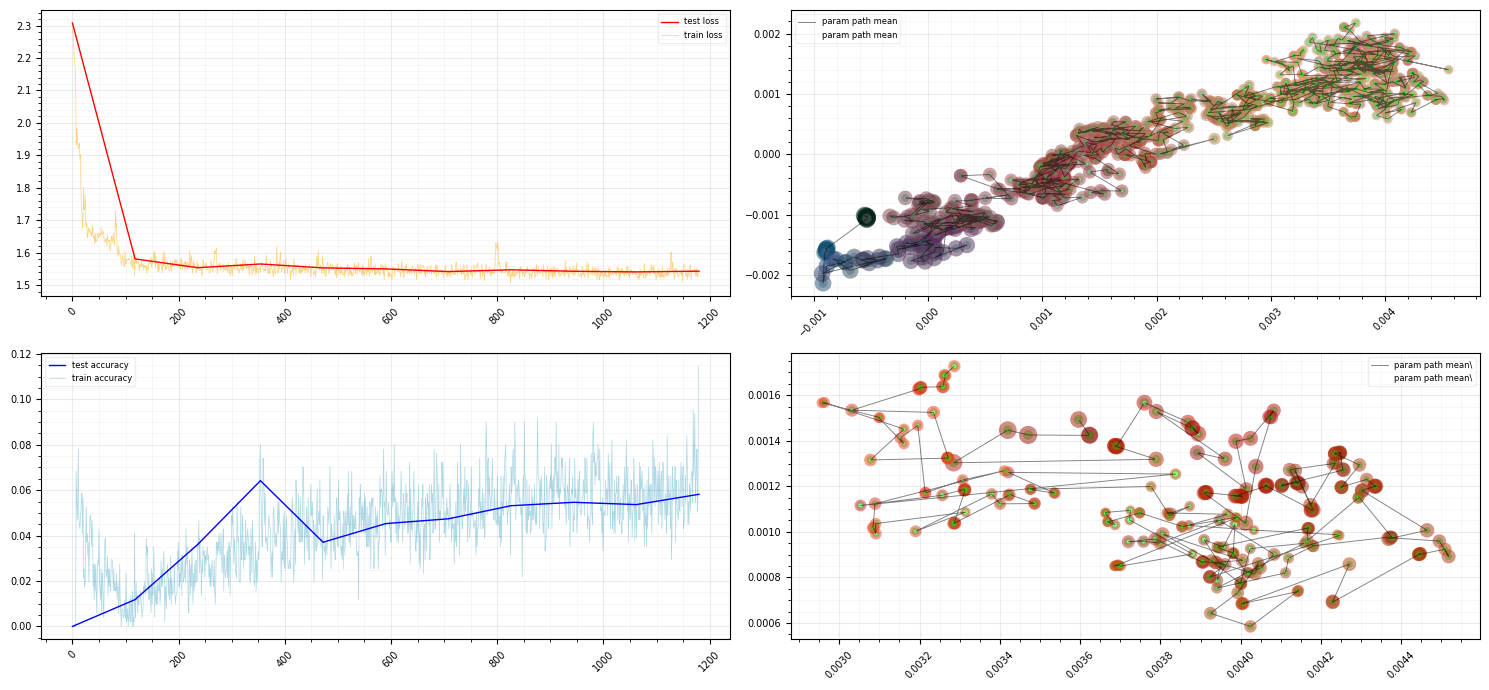

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉     | 10/10 | 6.06s/ops, elapsed: 54.52s, rem: 6.06s | 

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉  | 20/20 | 71.16ops/s, elapsed: 267ms, rem: 14ms | 
train loss:                              last = 1.542, min = 1.506, max = 2.292
test loss:                               last = 1.541, min = 1.541, max = 2.308
train accuracy:                          last = 0.115, min = 0.000, max = 0.115
test accuracy:                           last = 0.054, min = 0.000, max = 0.064

| metric | n | min | max | first | last |
| :- | :- | :- | :- | :- | :- |
| grad std | 1180 | 0.0004 | 0.0066 | 0.0042 | 0.0018 |
| grad-update angle | 1180 | 1.3540 | 1.8354 | 1.6791 | 1.5645 |
| grad-update mean | 1180 | 0.0003 | 0.0198 | 0.0025 | 0.0013 |
| last grads mean | 1179 | 0.0004 | 0.0044 | 0.0015 | 0.0012 |
| last updates std | 1179 | 0.0000 | 0.0275 | 0.0002 | 0.0015 |
| param max | 1180 | 0.0376 | 1.0494 | 0.0376 | 1.0491 |
| param mean | 1180 | -0.0001 | -0.0001 | -0.0001 | -0.0001 |
| param min | 1180 | -1.0018 | -0.0373 | -0.0373 | -1.0018 |
| param var | 1180 | 0.0004 | 0.0240 | 0.0004 | 0.0240 |
| train accuracy | 1180 | 0.0000 | 0.1146 | 0.0000 | 0.1146 |
| test accuracy | 11 | 0.0000 | 0.0642 | 0.0000 | 0.0582 |
| test accuracy max | 11 | 0.0000 | 0.1094 | 0.0000 | 0.1035 |
| test accuracy median | 11 | 0.0000 | 0.0645 | 0.0000 | 0.0557 |
| test accuracy min | 11 | 0.0000 | 0.0312 | 0.0000 | 0.0234 |
| train loss | 1180 | 1.5060 | 2.2917 | 2.2917 | 1.5424 |
| test loss | 11 | 1.5409 | 2.3080 | 2.3080 | 1.5431 |
| test loss max | 11 | 1.5982 | 2.3129 | 2.3129 | 1.6094 |
| test loss median | 11 | 1.5440 | 2.3085 | 2.3085 | 1.5510 |
| test loss min | 11 | 1.4911 | 2.3020 | 2.3020 | 1.4924 |
| time | 1180 | 0.8793 | 60.9600 | 0.8793 | 60.9600 |
| update angle | 1180 | 0.0003 | 0.9342 | 0.0205 | 0.0127 |
| update var | 1180 | 0.0000 | 0.0008 | 0.0000 | 0.0000 |


In [3]:
from torchzero.optim.first_order.gradient_direction_curvature import QuadraticGDC
with seeded_rng(): MODEL = get_model()
LR = 1e-1
BATCH_SIZE = 512
N_EPOCHS = 10
LOSS_FN = nn.CrossEntropyLoss()
METRIC_STEP = 1

with seeded_rng():
    DLTRAIN = DataLoader(dstrain, BATCH_SIZE, shuffle=True, **seed0_kwargs)
    DLTEST = DataLoader(dstest, BATCH_SIZE, shuffle=False, **seed0_kwargs)

OPT = QuadraticGDC(MODEL.parameters(), lr = LR, debug=True)
#SCHED = lr_scheduler.CosineAnnealingLR(OPT, N_EPOCHS)
SCHED = None

CALLBACKS = (LogLossCB(),

            SaveForwardChannelImagesCB(dstest[0][0].unsqueeze(0)),
            MetricAccuracyCB(),
            LogParamDistCB(METRIC_STEP),
            LogParamPathCB(METRIC_STEP),
            LogUpdateDistCB(METRIC_STEP),
            LogUpdatePathCB(METRIC_STEP),
            LogLastUpdatesAngleCB(METRIC_STEP),
            LogGradDistCB(METRIC_STEP),
            LogGradUpdateAngleCB(METRIC_STEP),
            LogGradPathCB(METRIC_STEP),
            LogLastGradsAngleCB(METRIC_STEP),
            LogTimeCB(),
            #LogLRCB(),
            #LogOptimizerParamCB('magn'),
            DisplayLoggerTableCB(),
            AccelerateCB("no"),
            PerformanceTweaksCB(True),
            SaveLastCB(),
            LivePlotCB(1000, plot_keys = ("4plotsplot","10metrics01"),path_keys=("4plotspath250",)),
            SimpleProgressBarCB(),
            OneBatchClosureCB(),
            #GradientFreeWithZeroGradCB(),
            #OneBatchClosureWithNoBackwardCB(),
)
clean_mem()

# MODEL = gnn.LSUV(MODEL, DLTRAIN, max_iter=5)

LEARNER_NAME = f"RandomOptimizer lr{LR:.0e} magn{LR:.0e}"
learner = Learner(MODEL, LEARNER_NAME, CALLBACKS, loss_fn=LOSS_FN, optimizer=OPT, scheduler=SCHED, )
learner.fit(N_EPOCHS, DLTRAIN, DLTEST,test_on_interrupt=False)